---
<h1 align='center' style="color:green">natural gas-fired power generation plant</h1>
<h1 align='center' style="color:green">Power Prediction</h1>

---

## we will predict power output given a set of environmental readings from various sensors in a natural gas-fired power generation plant.

### we will predict power output given a set of environmental readings from various sensors in a natural gas-fired power generation plant.

---
### Import libraries to perform Extract-Transform-Load (ETL) and Exploratory Data Analysis (EDA)

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
%matplotlib inline

## 2. Load the data

In [2]:
data=pd.read_excel("data/Folds5x2_pp.xlsx")

## 3. Exploratory Data Analysis (EDA)

### Apply descriptive statitics
### This is a step that we should always perform before trying to fit a model to the data, as this step will often lead to important insights about our data.

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#### size of dataframe

In [5]:
data.shape

(9568, 5)

In [6]:
data.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

The columns in the DataFrame are:
>- AT = Atmospheric Temperature in C
>- V = Exhaust Vacuum Speed
>- AP = Atmospheric Pressure
>- RH = Relative Humidity
>- PE = Power Output

Power Output is the value we are trying to predict given the measurements above.

#### Are there any missing values in any of the columns?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
data.isna().sum() # there is no missing data in all of the columns

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

#### Class of each column in the DataFrame

In [9]:
data.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

#### Statitical details

In [10]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


---
## 4. Data Visualization

### Before we perform any modeling, it is a good idea to explore correlations between the predictors and the predictand. This step can be important as it helps us to select appropriate models. If our features and the outcome are linearly related, we may start with linear regression models.

### However, if the relationships between the label and the features are non-linear, non-linear ensemble models such as random forest can be better.

### 1. Correlation between power output and temperature

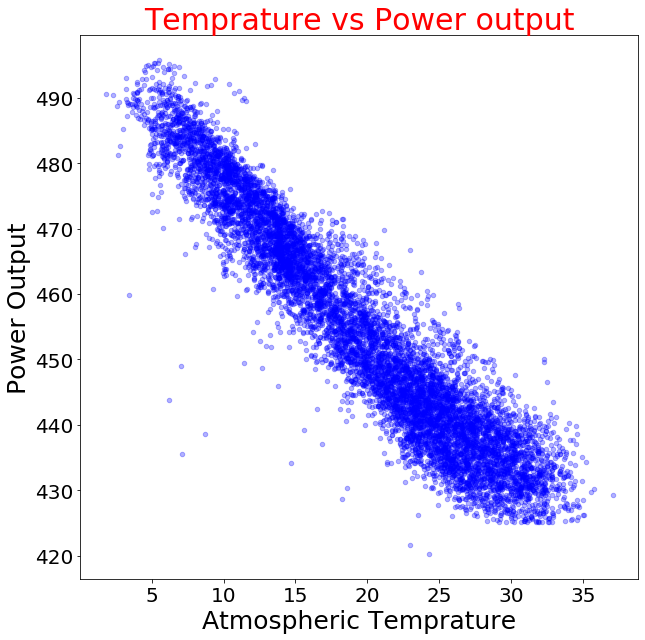

In [11]:
data.plot(x='AT',y="PE",kind='scatter',
          figsize=(10,10),color='b',
          alpha=0.3,fontsize=20
         )

plt.title("Temprature vs Power output",fontsize=30,
          color='red')
plt.xlabel("Atmospheric Temprature",fontsize=25)
plt.ylabel("Power Output",fontsize=25)
plt.show()

### As shown in the above figure, there is strong linear correlation between Atmospheric Temperature and Power Output.

---
### 2. Correlation between Exhaust Vacuum Speed and power output

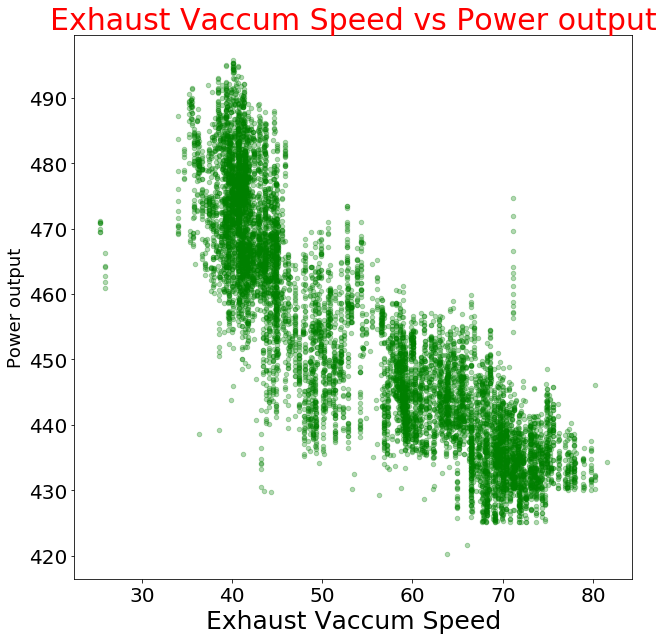

In [12]:
data.plot(x="V",y='PE',kind='scatter',
          figsize=(10,10),color='g',
          alpha=0.3,fontsize=20)

plt.title("Exhaust Vaccum Speed vs Power output",fontsize=30,color="r")
plt.xlabel("Exhaust Vaccum Speed",fontsize=25)
plt.ylabel("Power output",fontsize=18)
plt.show()

---
### 3. Correlation between Atmospheric Pressure and Power Output

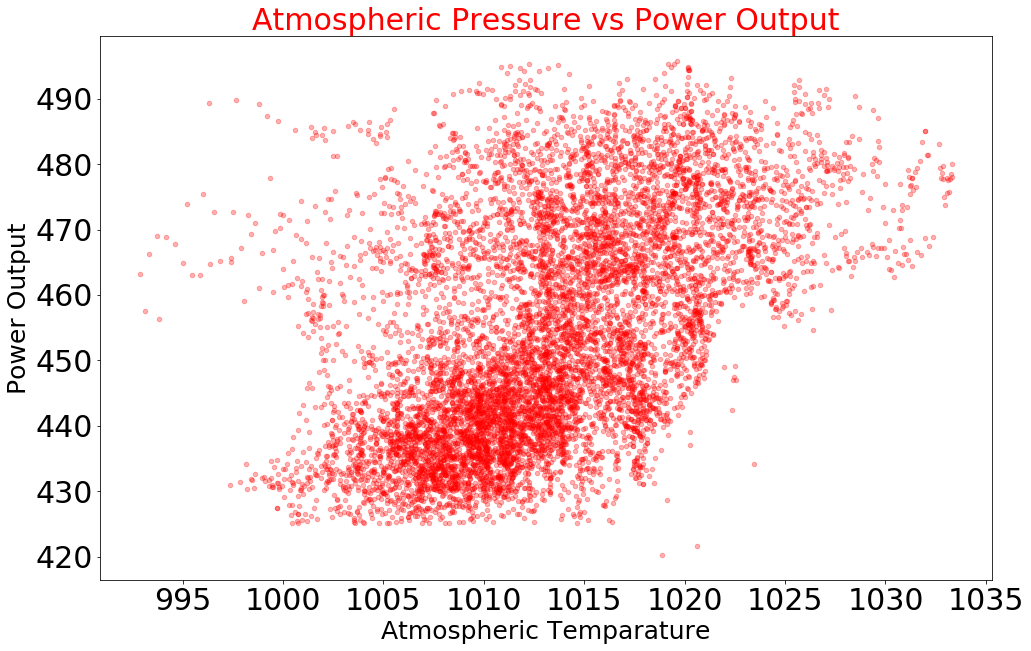

In [19]:
data.plot(x='AP',y='PE',kind='scatter',
          figsize=(16,10),color='r',
          alpha=0.3,fontsize=30
         )

plt.title("Atmospheric Pressure vs Power Output",fontsize=30,color='r')
plt.xlabel("Atmospheric Temparature",fontsize=25)
plt.ylabel("Power Output",fontsize=25)
plt.show()

---
### 4. Correlation between relative humidity and power output

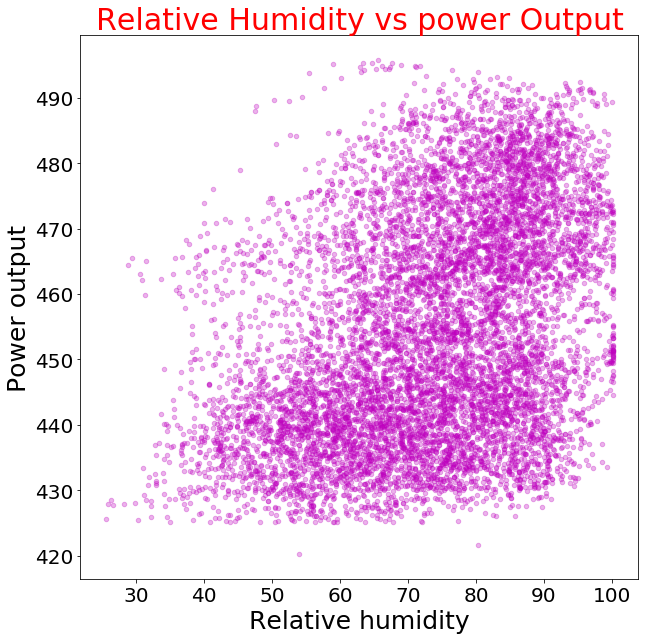

In [28]:
data.plot(x='RH',y='PE',kind='scatter',
          figsize=(10,10),color='m',
          alpha=0.3,fontsize=20)

plt.title("Relative Humidity vs power Output",fontsize=30,color='r')
plt.xlabel("Relative humidity",fontsize=25)
plt.ylabel("Power output",fontsize=25)
plt.show()

---
## Correlation Heatmap

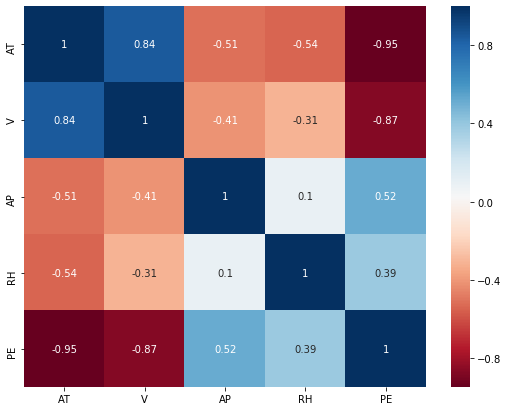

In [34]:
corr=data.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr,cmap='RdBu',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True
           )
plt.show()

### As shown in the correlation heatmap above, the target is correlated with the features. However, we also observe correlation among the features, hence we have multi-collinearity problem. He will use regularization to check if the collinearity we observe has a significant impact on the performance of linear regression model.



# Data Modeling

### All the columns are numeric and there are no missing values, which makes our modeling task straightforward.

### Now, let’s model our data to predict what the power output will be given a set of sensor readings. 
### Our first model will be based on simple linear regression since we saw some linear patterns in our data based on the scatter plots and correlation heatmap during the exploration stage.

### We need a way of evaluating how well our linear regression model predicts power output as a function of input parameters.
### We can do this by splitting up our initial data set into a Training Set, used to train our model and a Test Set, used to evaluate the model’s performance in giving predictions.

---
## Split data into training and test datasets
### Let’s split the original dataset into training and test datasets. The training dataset is 80% of the whole dataset, the test set is the remaining 20% of the original dataset.

In [45]:
# selelct feature or Training colums
X=data.drop("PE",axis=1).values
#select target column
y=data['PE'].values
print(X.shape) # 2D array
print(y.shape) # this is vector
y=y.reshape(-1,1)  # convert vector into 2D array
print(y.shape)

(9568, 4)
(9568,)
(9568, 1)


### Split dataset

In [63]:
from sklearn.model_selection import train_test_split

# Split into training n test dataset
# training (80%) and test (20%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

train_data_ratio=round(X_train.shape[0]/(data.shape[0]),2)*100
test_data_ratio =round(X_test.shape[0]/(data.shape[0]),2)*100

print("Training data ratio is : %.f"%train_data_ratio,"%")
print("Test data ration is    : %.f"%test_data_ratio,"%")

Training data ratio is : 80 %
Test data ration is    : 20 %


In [64]:
list(zip(["training set","Testing set"],[train_data_ratio,test_data_ratio]))

[('training set', 80.0), ('Testing set', 20.0)]

### As shown below 80.0% of the data is for training and the rest 20.0% is for testing.

---
## 1. Linear regression Model

### (A) Work on TRAIN DATA

In [72]:
# Instantiate linear regression: reg
# Standardize features by removing the mean 
# and scaling to unit variance using the
# StandardScaler() function

from sklearn.preprocessing import StandardScaler
# Apply Scaling to X_train,X_test
std_scale=StandardScaler()

# fit data
std_scale.fit(X_train)

# Transform data
X_train_scaled=std_scale.transform(X_train)  #2d array
X_test_scaled=std_scale.transform(X_test)

In [82]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()

reg_scaled=lin_reg.fit(X_train_scaled,y_train)
y_train_scaled_fit=reg_scaled.predict(X_train_scaled)

### > R-sqaured for training dataset

In [88]:
print("R-squared for training dataset :{}".format(np.round(reg_scaled.score(X_train_scaled,y_train),2)))

R-squared for training dataset :0.93


### > Root mean square error for train dataset

In [93]:
from sklearn.metrics import mean_squared_error

print("Root mean square error : {}".format(np.round(np.sqrt(mean_squared_error(y_train,y_train_scaled_fit)),2)))

Root mean square error : 4.57


### > Coefficients & Intercept

In [109]:
# coefficients
coefficients=reg_scaled.coef_
# coefficients   # got 4 coef_ for each columns

features=list(data.drop("PE",axis=1).columns)
print()

print("the coefficients of the features from the linear model: ")
print(dict(zip(features,coefficients[0])))
print()

print("The intercept is {}".format(np.round(reg_scaled.intercept_[0],3)))


the coefficients of the features from the linear model: 
{'AT': -14.763927385645436, 'V': -2.9496320985616364, 'AP': 0.36978031656086885, 'RH': -2.3121956560685852}

The intercept is 454.431


### (B) Work on TEST DATA

In [110]:
pred=reg_scaled.predict(X_test_scaled)

### > R-squared for test dataset

In [112]:
print("R-squared for test dataset : {}".format(np.round(reg_scaled.score(X_test_scaled,y_test),2)))

R-squared for test dataset : 0.93


### > Root mean square error for test dataset

In [113]:
print("Root mean square error for test dataset : {}".format(np.round(np.sqrt(mean_squared_error(y_test,pred)),2)))

Root mean square error for test dataset : 4.5


### > Prediction & Observed

In [127]:
data={"prediction":pred,"observed":y_test}

# make dataframe of prediction
test=pd.DataFrame(pred,columns=["prediction"])



test['observed']=y_test

import statsmodels.api as sm
lowess=sm.nonparametric.lowess
z=lowess(pred.flatten(),y_test.flatten())

### > plot the data

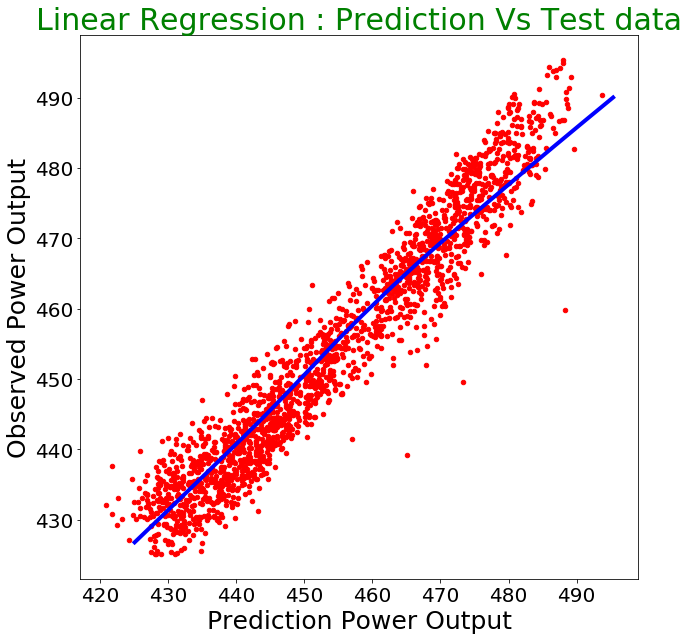

In [147]:
test.plot(figsize=(10,10),
          x="prediction",y="observed",kind="scatter",
          color='r',fontsize=20
         )
plt.title("Linear Regression : Prediction Vs Test data",fontsize=30,color='g')
plt.xlabel("Prediction Power Output",fontsize=25)
plt.ylabel("Observed Power Output",fontsize=25)
plt.plot(z[:,0],z[:,1],color='b',lw=4)
plt.show()

### we saw non-regularized multivariate linear regression